## Import Library

In [1]:
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import matplotlib.cm as cm
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from collections import Counter

plt.style.use('bmh'); sns.set()

# Baca Data

In [2]:
# input data jual rumah di Lampung
lampung = pd.read_csv('https://raw.githubusercontent.com/ttodasi/DatMin-Project-Rumah-Kelompok-9/main/9.csv')

In [3]:
# melihat jumlah baris dan kolom pada data
N, P = lampung.shape
'baris = ', N, ', Kolom = ', P

('baris = ', 100, ', Kolom = ', 18)

In [4]:
# mengintip beberapa data awal
lampung.head()

,No,Tgl_Iklan,url,harga,kota,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat,judul,deskripsi,Unnamed: 17
0,1,28/12/2016,https://www.rumah123.com/properti/bandar-lampu...,3500.0,Bandar Lampung,220,216,4.0,3.0,1,1,2,1,4400.0,SHM,RUMAH MEWAH DI PERUMAHAN KOTA BANDAR LAMPUNG,PERUM CITRA GARDEN CLUSTER VERSAILES TYPE CORS...,NaN
1,2,18/9/2018,https://www.rumah123.com/properti/bandar-lampu...,1500.0,Bandar Lampung,380,200,3.0,4.0,2,0,0,0,1300.0,SHM,Rumah asri di Way Halim Sepang Jaya siap huni,dijual cepat rumah di way halim sepang Jaya\nL...,NaN
2,3,20/9/2018,https://www.rumah123.com/properti/bandar-lampu...,1900.0,Bandar Lampung,160,155,3.0,3.0,1,1,1,1,2200.0,SHM,Rumah Minimalis 2 lantai di Perumahan Citra Ga...,Luas Tanah:160\nLuas Bangunan: 155\nKamar Tidu...,NaN
3,4,21/9/2018,https://www.rumah123.com/properti/bandar-lampu...,2350.0,Bandar Lampung,160,189,3.0,2.0,1,1,0,0,2200.0,SHM,"RUMAH NYAMAN PERUM CITRA GARDEN , TELUK BETUNG...",LT / LB : 160 m2 / 189 m2\n2 Lantai\n2.200 Wat...,NaN
4,5,23/10/2018,https://www.rumah123.com/properti/bandar-lampu...,1400.0,Bandar Lampung,1036,243,5.0,3.0,0,0,0,2,1300.0,SHM,"RUMAH HALAMAN LUAS JLN. PULAU TIODORE , JAGABA...",LT : 1036 M2 \nLB : 243 M2 \n1 LANTAI\n5 KMAR ...,NaN


# Mengoreksi Tipe variabel

In [5]:
# tipe data di setiap kolom
lampung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           100 non-null    int64  
 1   Tgl_Iklan    100 non-null    object 
 2   url          100 non-null    object 
 3   harga        100 non-null    float64
 4   kota         100 non-null    object 
 5   LT           100 non-null    int64  
 6   LB           100 non-null    int64  
 7   KT           99 non-null     float64
 8   KM           99 non-null     float64
 9   KTP          100 non-null    int64  
 10  KMP          100 non-null    int64  
 11  carport      100 non-null    int64  
 12  garasi       100 non-null    int64  
 13  listrik      97 non-null     float64
 14  surat        100 non-null    object 
 15  judul        100 non-null    object 
 16  deskripsi    100 non-null    object 
 17  Unnamed: 17  1 non-null      object 
dtypes: float64(4), int64(7), object(7)
memory usage: 14

In [6]:
# Remove baris No, kota karena datanya seragam sehingga tidak mempengaruhi dalam preprocessing
# Remove baris 'Unnamed: 17' karena tidak ada isi datanya
# Remove baris judul, deskripsi, url karena datanya beragam dan tidak mempengaruhi dalam preprocessing
lampung.drop(["No", "kota", "Unnamed: 17", "judul", "deskripsi", "url"], axis=1, inplace=True)

In [7]:
# Menyesuaikan tipe variabel
lampung['Tgl_Iklan']= pd.to_datetime(lampung['Tgl_Iklan'])
lampung['surat'] = lampung['surat'].astype('category')
lampung.dtypes

Tgl_Iklan    datetime64[ns]
harga               float64
LT                    int64
LB                    int64
KT                  float64
KM                  float64
KTP                   int64
KMP                   int64
carport               int64
garasi                int64
listrik             float64
surat              category
dtype: object

# Cek Data yang Terdapat Duplikasi

In [8]:
print(lampung.duplicated().sum())
print(lampung.shape) # re-check by printing data size

0
(100, 12)


# Seleksi Variabel

In [9]:
# Memilih hanya variable numerik
lampung_num = lampung.select_dtypes(include = ['float64', 'int64'])
lampung_num.head()

,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik
0,3500.0,220,216,4.0,3.0,1,1,2,1,4400.0
1,1500.0,380,200,3.0,4.0,2,0,0,0,1300.0
2,1900.0,160,155,3.0,3.0,1,1,1,1,2200.0
3,2350.0,160,189,3.0,2.0,1,1,0,0,2200.0
4,1400.0,1036,243,5.0,3.0,0,0,0,2,1300.0


In [10]:
# Memilih hanya variable kategorik
lampung_cat = lampung.select_dtypes(include = ['category'])
lampung_cat.head()

,surat
0,SHM
1,SHM
2,SHM
3,SHM
4,SHM


# Dasar Pengolahan variabel Kategorik: Dummy Variable

In [11]:
df = pd.get_dummies(lampung['surat'], prefix='sertifikat')
df.head()

,sertifikat_AJB,sertifikat_SHGB,sertifikat_SHM
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


# Menggabungkan dengan data awal (concat)

In [12]:
df2 = pd.concat([lampung, df], axis = 1)
df2.head().transpose()

,0,1,2,3,4
Tgl_Iklan,2016-12-28 00:00:00,2018-09-18 00:00:00,2018-09-20 00:00:00,2018-09-21 00:00:00,2018-10-23 00:00:00
harga,3500,1500,1900,2350,1400
LT,220,380,160,160,1036
LB,216,200,155,189,243
KT,4,3,3,3,5
KM,3,4,3,2,3
KTP,1,2,1,1,0
KMP,1,0,1,1,0
carport,2,0,1,0,0
garasi,1,0,1,0,2


#Outliers

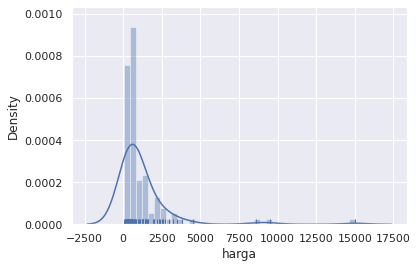

In [13]:
# Distribusi
p = sns.distplot(lampung['harga'], kde=True, rug=True)

In [14]:
# menggunakan 95% confidence interval di sekitar variabel "harga"
df = np.abs(lampung.harga - lampung.harga.mean())<=(2*lampung.harga.std())
# mu-2s<x<mu+2s
print(df.shape)
df.head()

(100,)


0    True
1    True
2    True
3    True
4    True
Name: harga, dtype: bool

In [15]:
lampung2 = lampung[df] # Data tanpa outliers
print(lampung2.shape) # cek size data sekarang

(97, 12)


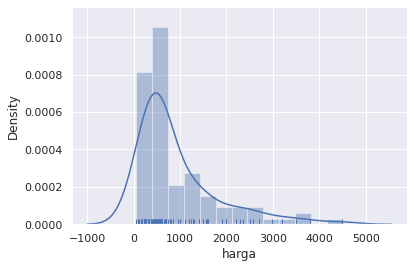

In [16]:
# Distribusi tanpa outliers
p = sns.distplot(lampung2['harga'], kde=True, rug=True)

# Missing Values

In [17]:
# Mengecek ada/tidaknya Missing Values
print(lampung2.isnull().sum())

Tgl_Iklan    0
harga        0
LT           0
LB           0
KT           1
KM           1
KTP          0
KMP          0
carport      0
garasi       0
listrik      3
surat        0
dtype: int64


In [18]:
lampung2.dropna(how='all') # jika ada MV di semua kolom, maka baris di hapus
lampung2.dropna(inplace=True) # inplace=True if really really sure

# Statistika Deskriptif

In [19]:
# Statistika Sederhana dari data "Numerik"-nya
lampung2.describe()

,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,939.499468,244.446809,151.723404,3.670213,2.446809,0.138298,0.074468,1.319149,0.351064,1693.085106
std,892.372879,340.262884,144.588954,2.833700,1.732777,0.404306,0.301942,2.351905,1.023461,894.174728
min,60.000000,45.000000,25.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,450.000000
25%,388.050000,90.250000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1300.000000
50%,579.750000,137.500000,85.000000,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1300.000000
75%,1230.000000,216.750000,200.000000,4.000000,3.000000,0.000000,0.000000,1.000000,0.000000,2200.000000
max,4500.000000,2662.000000,996.000000,25.000000,10.000000,2.000000,2.000000,20.000000,7.000000,6600.000000


In [20]:
# Statistika Sederhana dari semua data
lampung2.describe(include='all')

,Tgl_Iklan,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat
count,94,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94
unique,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,2021-03-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SHM
freq,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89
first,2016-12-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-11-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,939.499468,244.446809,151.723404,3.670213,2.446809,0.138298,0.074468,1.319149,0.351064,1693.085106,NaN
std,NaN,892.372879,340.262884,144.588954,2.833700,1.732777,0.404306,0.301942,2.351905,1.023461,894.174728,NaN
min,NaN,60.000000,45.000000,25.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,450.000000,NaN
25%,NaN,388.050000,90.250000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1300.000000,NaN


#Visualisasi Data

## Apakah ada kecenderungan perbedaan harga rumah akibat dari tipe surat rumah?

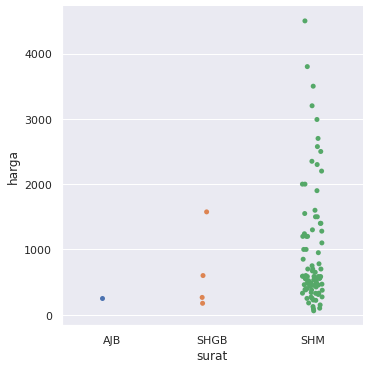

In [21]:
p= sns.catplot(x="surat", y="harga", data=lampung2)

Terdapat kecenderungan perbedaan harga rumah akibat surat rumah, dimana harga rumah yang memiliki surat SHM lebih tinggi dibandingkan tipe surat yang lainnya

# Apakah ada kecenderungan perbedaan harga rumah akibat dari luas tanah dan luas bangunan?

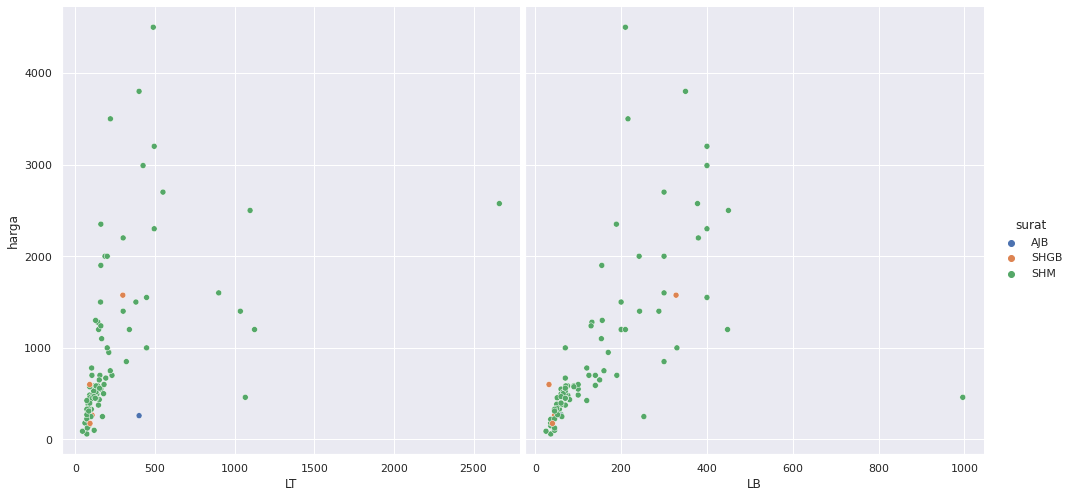

In [22]:
p = sns.pairplot(lampung2, x_vars =['LT', 'LB'], y_vars = ['harga'], hue="surat", height= 7)

Dilihat dari grafik di atas, terlihat tidak adanya kecenderungan harga rumah yang dipengaruhi oleh luas tanah. Sedangkan luas bangunan mempengaruhi harga rumah.

# Apakah ada kecenderungan perbedaan harga rumah akibat dari jumlah kamar tidur dan kamar mandi?

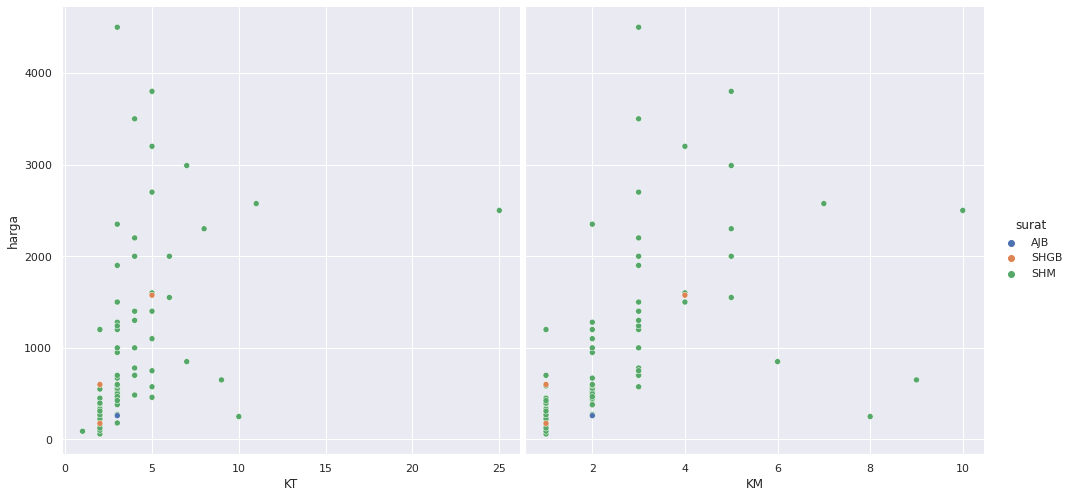

In [23]:
p = sns.pairplot(lampung2, x_vars =['KT', 'KM'], y_vars = ['harga'], hue="surat", height= 7)

Terdapat kecenderungan perbedaan harga rumah. Namun pada beberapa data, terdapat rumah yang harganya tinggi dengan memiliki jumlah kamar tidur dan kamar mandi yang tidak sebanding.

# Apakah ada kecenderungan perbedaan harga rumah akibat dari tipe parkir?

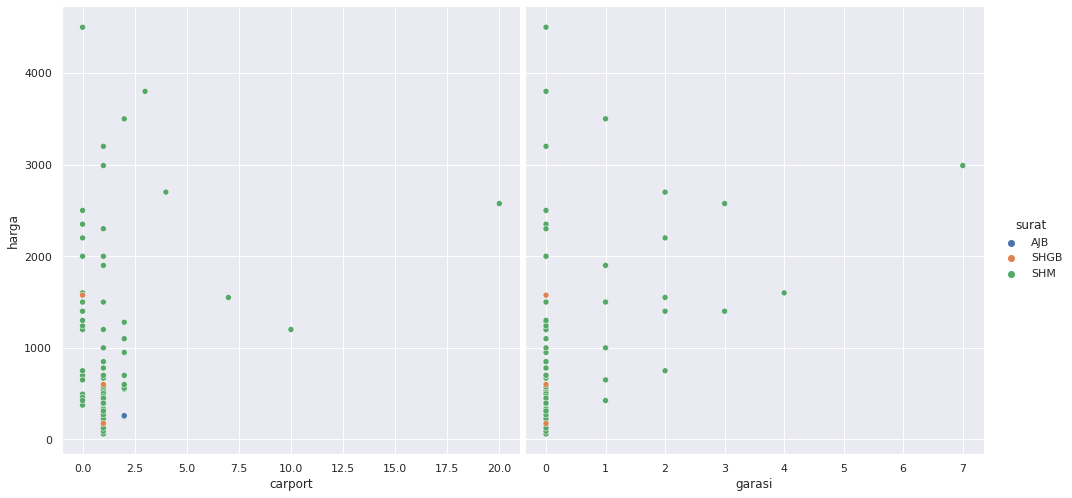

In [24]:
p = sns.pairplot(lampung2, x_vars =['carport', 'garasi'], y_vars = ['harga'], hue="surat", height= 7)

Berdasarkan grafik di atas, rumah yang dijual di Lampung rata-rata memiliki 1 carport dan tidak memiliki garasi. Dapat dilihat juga bahwa carport tidak memengaruhi harga rumah, sedangkan rumah yang memiliki garasi harganya lebih tinggi. Tetapi pada beberapa data yang diperoleh, terdapat rumah yang tidak memiliki garasi yang harganya tinggi

# Apakah ada kecenderungan perbedaan harga rumah akibat dari listrik?

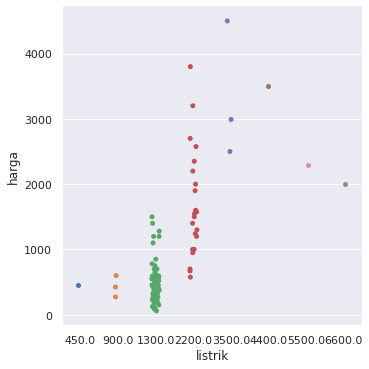

In [25]:
p= sns.catplot(x="listrik", y="harga", data=lampung2)

Terlihat adanya kecenderungan perbedaan harga rumah berdasarkan besarnya daya listrik.

# Cek Korelasi

In [26]:
lampung2.corr()

,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik
harga,1.000000,0.458348,0.567454,0.414423,0.526480,0.259629,0.322188,0.196382,0.405315,0.683884
LT,0.458348,1.000000,0.642251,0.537397,0.484970,0.022056,0.031594,0.709020,0.423173,0.221071
LB,0.567454,0.642251,1.000000,0.519168,0.544913,0.138431,0.166973,0.222014,0.372623,0.375791
KT,0.414423,0.537397,0.519168,1.000000,0.862487,-0.034846,0.003877,0.191824,0.255390,0.408816
KM,0.526480,0.484970,0.544913,0.862487,1.000000,0.079681,0.059032,0.202097,0.341088,0.468375
KTP,0.259629,0.022056,0.138431,-0.034846,0.079681,1.000000,0.707460,-0.126072,0.011334,0.252514
KMP,0.322188,0.031594,0.166973,0.003877,0.059032,0.707460,1.000000,-0.079252,0.053674,0.360365
carport,0.196382,0.709020,0.222014,0.191824,0.202097,-0.126072,-0.079252,1.000000,0.225446,0.013587
garasi,0.405315,0.423173,0.372623,0.255390,0.341088,0.011334,0.053674,0.225446,1.000000,0.261173
listrik,0.683884,0.221071,0.375791,0.408816,0.468375,0.252514,0.360365,0.013587,0.261173,1.000000


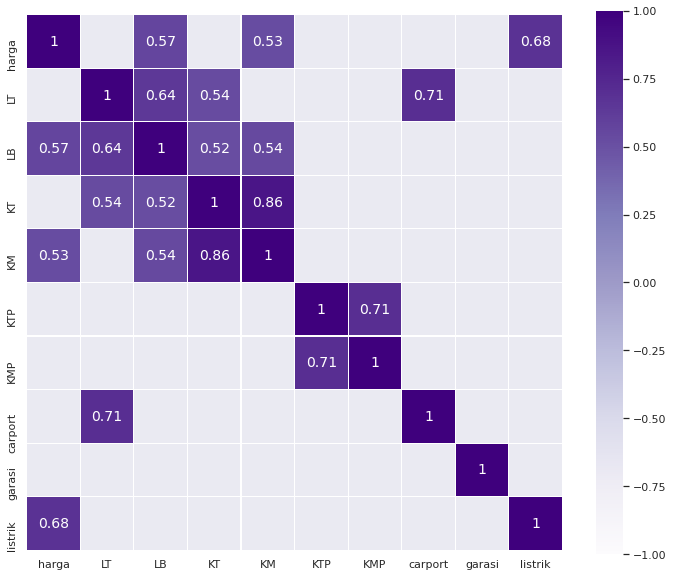

In [27]:
# HeatMap untuk menyelidiki korelasi
corr2 = lampung2.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr2[(corr2 >= 0.5) | (corr2 <= -0.4)], 
            cmap='Purples', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);

# Kesimpulan

Berdasarkan hasil visualisasi di atas dapat disimpulkan bahwa harga rumah dipengaruhi oleh :
1. Luas bangunan
2. Jumlah kamar tidur
3. Jumlah kamar mandi
4. Listrik

# Clustering

In [28]:
!pip install --upgrade umap-learn
!wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py

     |████████████████████████████████| 81kB 5.4MB/s 
     |████████████████████████████████| 1.2MB 12.6MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=a571a9fffd33e62fcfe1fd34b4ca6a95c0cb13c6cade963eb84964cbc9579cd0
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51351 sha256=f0468c0c1e135f300c616f5ac5640d8dbc47131dfa07b0e99fa83c4f5f98d296
  Stored in directory: /root/.cache/pip/wheels/ba/52/4e/4c28d04d144a28f89e2575fb63628df6e6d49b56c5ddd0c74e
Successfully built umap-learn pynndescent
--2021-04-13 14:54:33--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:

In [217]:
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
import umap, numpy as np, tau_unsup as tau, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI 

sns.set(style="ticks", color_codes=True)

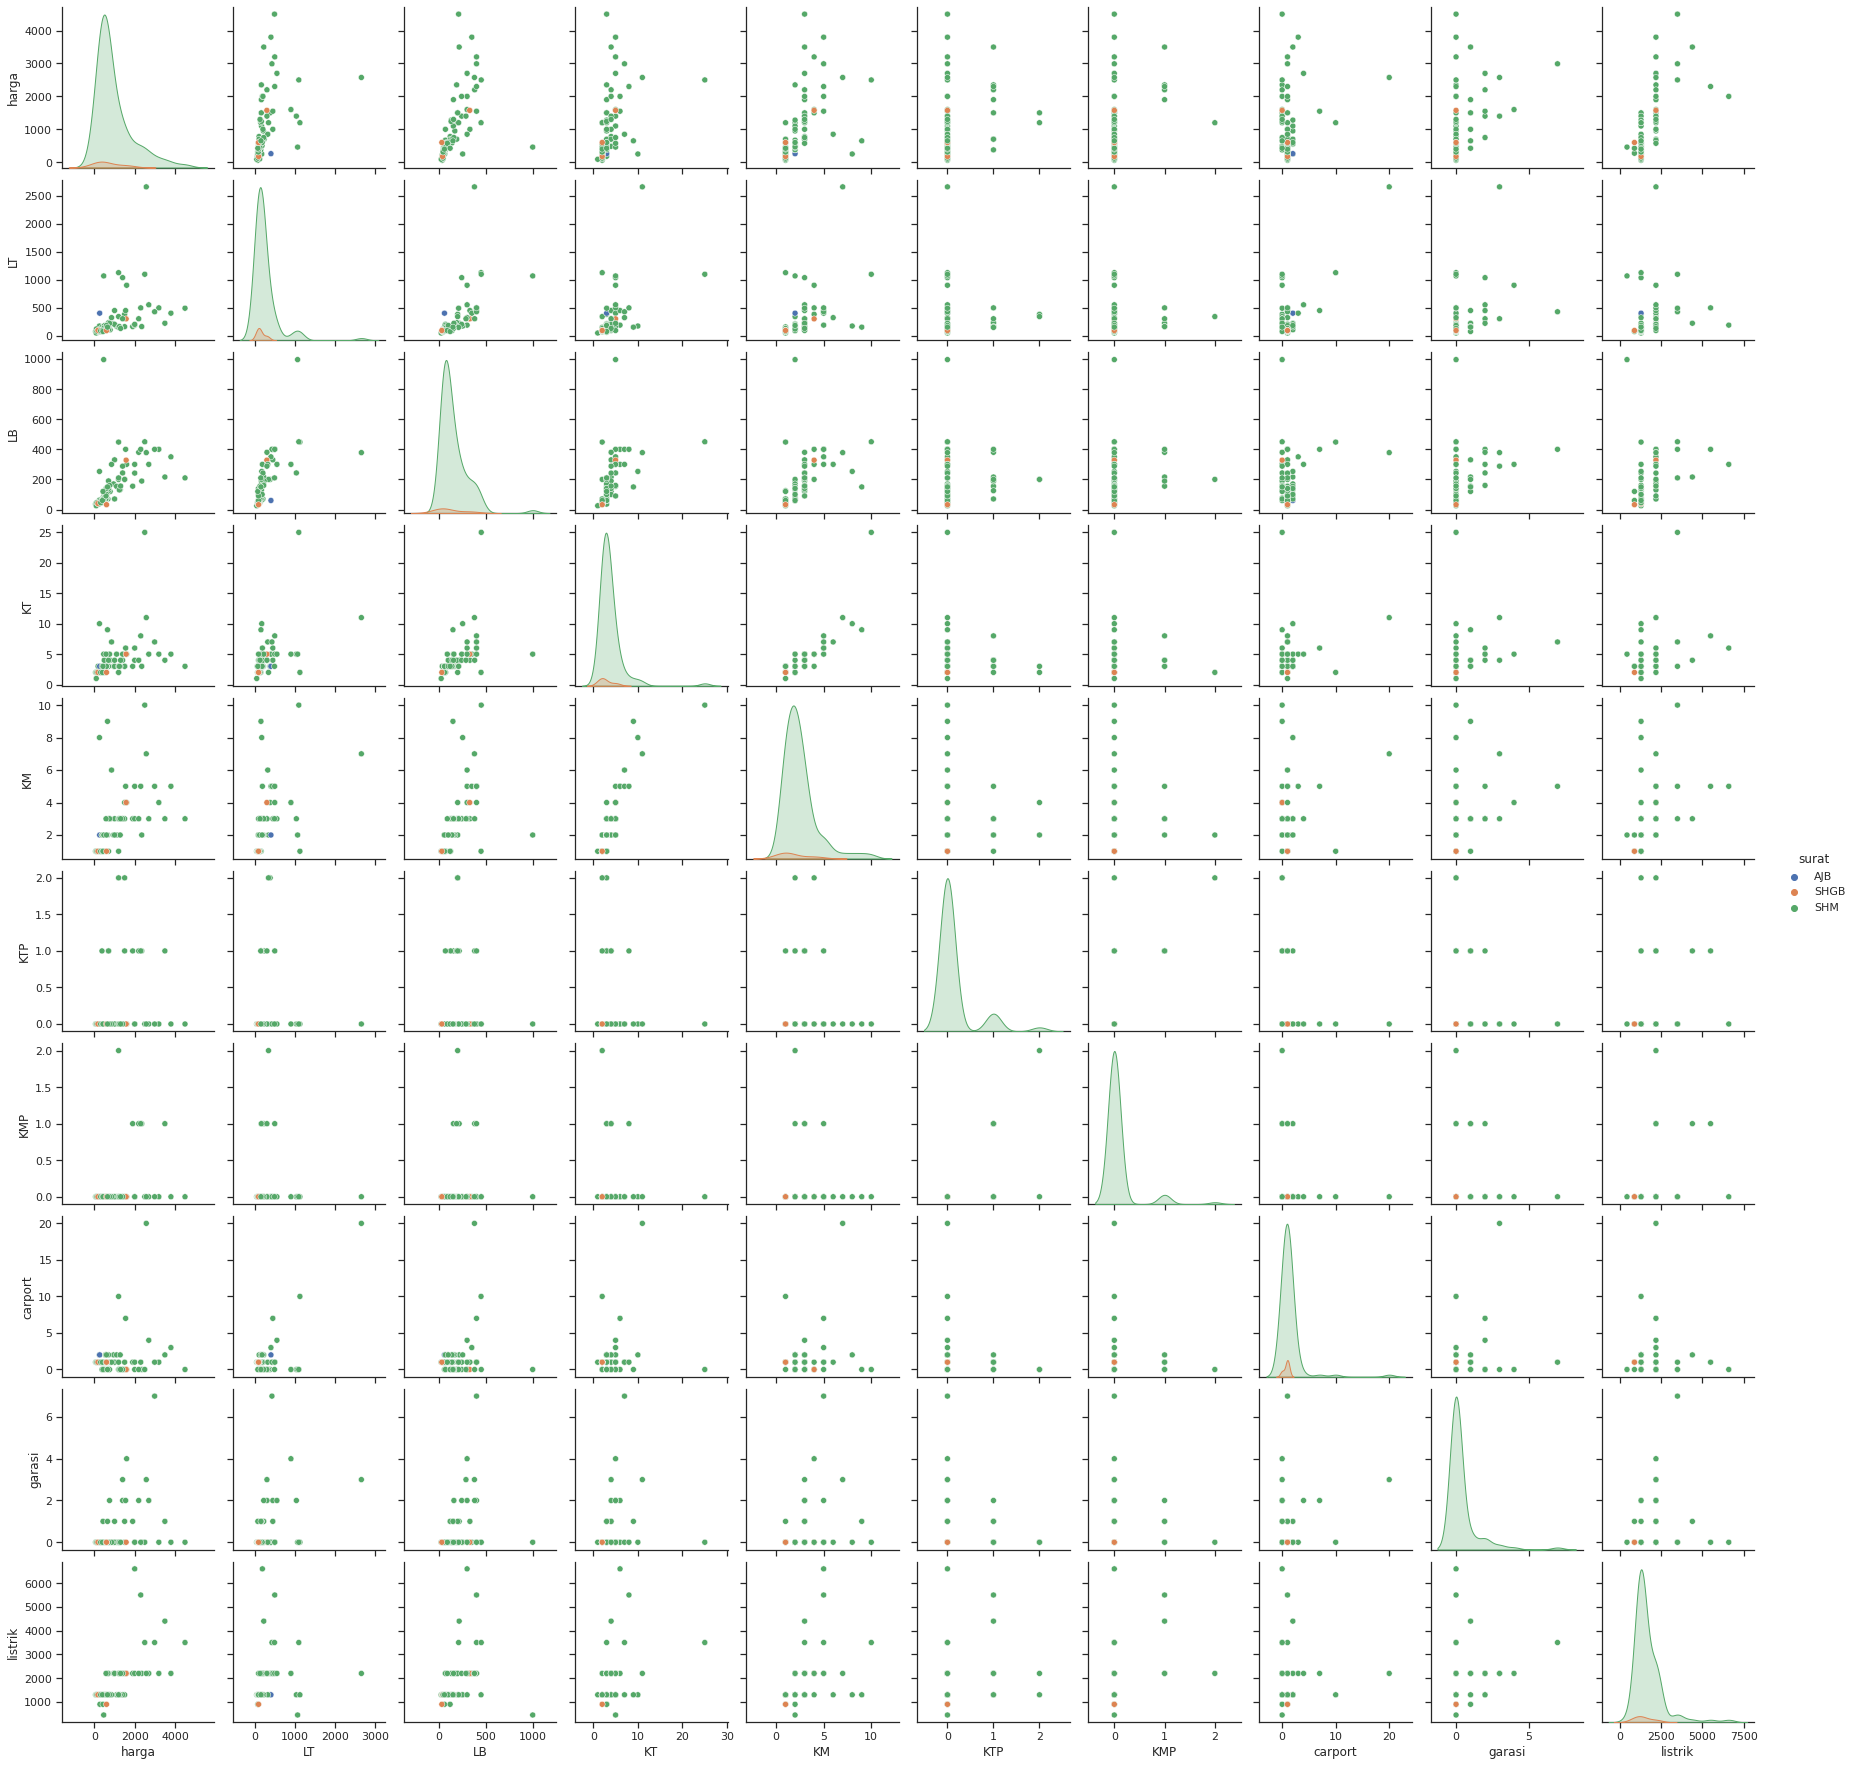

In [169]:
sns.pairplot(lampung2,hue='surat');

In [170]:
lampung_num2 = lampung2.select_dtypes(include = ['float64', 'int64'])
lampung_num2.head()

,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik
0,3500.0,220,216,4.0,3.0,1,1,2,1,4400.0
1,1500.0,380,200,3.0,4.0,2,0,0,0,1300.0
2,1900.0,160,155,3.0,3.0,1,1,1,1,2200.0
3,2350.0,160,189,3.0,2.0,1,1,0,0,2200.0
4,1400.0,1036,243,5.0,3.0,0,0,0,2,1300.0


In [171]:
lp = np.array(lampung_num2)
lp[:5]

array([[3.500e+03, 2.200e+02, 2.160e+02, 4.000e+00, 3.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 1.000e+00, 4.400e+03],
       [1.500e+03, 3.800e+02, 2.000e+02, 3.000e+00, 4.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.300e+03],
       [1.900e+03, 1.600e+02, 1.550e+02, 3.000e+00, 3.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 2.200e+03],
       [2.350e+03, 1.600e+02, 1.890e+02, 3.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 2.200e+03],
       [1.400e+03, 1.036e+03, 2.430e+02, 5.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 1.300e+03]])

In [172]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
c_scaled = mm.fit_transform(lp)
c_scaled[:5]

array([[0.77477477, 0.06687046, 0.19670443, 0.125     , 0.22222222,
        0.5       , 0.5       , 0.1       , 0.14285714, 0.64227642],
       [0.32432432, 0.12800917, 0.18022657, 0.08333333, 0.33333333,
        1.        , 0.        , 0.        , 0.        , 0.13821138],
       [0.41441441, 0.04394345, 0.1338826 , 0.08333333, 0.22222222,
        0.5       , 0.5       , 0.05      , 0.14285714, 0.28455285],
       [0.51576577, 0.04394345, 0.16889804, 0.08333333, 0.11111111,
        0.5       , 0.5       , 0.        , 0.        , 0.28455285],
       [0.3018018 , 0.37867788, 0.22451081, 0.16666667, 0.22222222,
        0.        , 0.        , 0.        , 0.28571429, 0.13821138]])

In [218]:
scaled = pd.DataFrame(c_scaled)
c_scaled.head()

,0,1,2,3,4,5,6,7,8,9
0,0.774775,0.066870,0.196704,0.125000,0.222222,0.5,0.5,0.10,0.142857,0.642276
1,0.324324,0.128009,0.180227,0.083333,0.333333,1.0,0.0,0.00,0.000000,0.138211
2,0.414414,0.043943,0.133883,0.083333,0.222222,0.5,0.5,0.05,0.142857,0.284553
3,0.515766,0.043943,0.168898,0.083333,0.111111,0.5,0.5,0.00,0.000000,0.284553
4,0.301802,0.378678,0.224511,0.166667,0.222222,0.0,0.0,0.00,0.285714,0.138211


In [177]:
c_scaled = pd.DataFrame(c_scaled)
c_scaled.head()

,0,1,2,3,4,5,6,7,8,9
0,0.774775,0.066870,0.196704,0.125000,0.222222,0.5,0.5,0.10,0.142857,0.642276
1,0.324324,0.128009,0.180227,0.083333,0.333333,1.0,0.0,0.00,0.000000,0.138211
2,0.414414,0.043943,0.133883,0.083333,0.222222,0.5,0.5,0.05,0.142857,0.284553
3,0.515766,0.043943,0.168898,0.083333,0.111111,0.5,0.5,0.00,0.000000,0.284553
4,0.301802,0.378678,0.224511,0.166667,0.222222,0.0,0.0,0.00,0.285714,0.138211


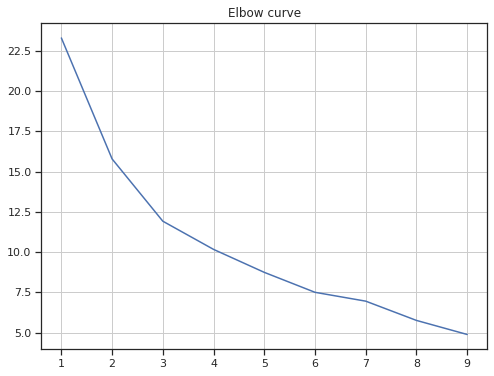

In [178]:
distorsions, k1, kN = [], 1, 10
for k in range(k1, kN):
    kmeans = KMeans(n_clusters=k).fit(c_scaled)
    distorsions.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve');

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1], dtype=int32)

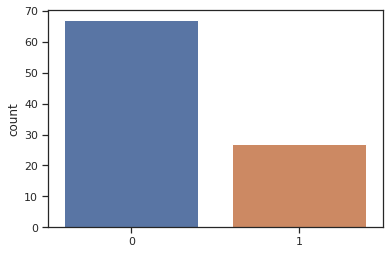

In [179]:
kmp = KMeans(n_clusters=2, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-2, random_state = 109)
kmp.fit(c_scaled)
C_kmp = kmp.predict(c_scaled)

sns.countplot(C_kmp);
kmp.labels_

array([2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1], dtype=int32)

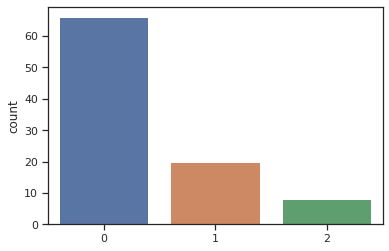

In [180]:
kmp1 = KMeans(n_clusters=3, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-2, random_state = 109)
kmp1.fit(c_scaled)
C_kmp1 = kmp1.predict(c_scaled)

sns.countplot(C_kmp1);
kmp1.labels_

array([2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 1], dtype=int32)

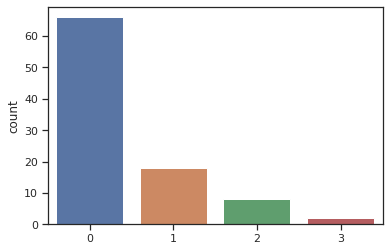

In [181]:
kmp2 = KMeans(n_clusters=4, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = 42)
kmp2.fit(c_scaled)
C_kmp2 = kmp2.predict(c_scaled)

sns.countplot(C_kmp2);
kmp2.labels_

array([2, 4, 2, 2, 1, 1, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 4, 4, 1, 0, 1, 1, 0, 4, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 1], dtype=int32)

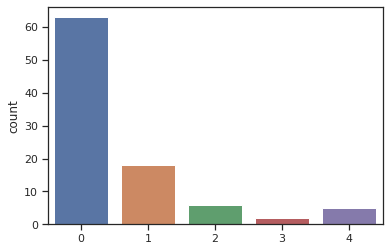

In [182]:
kmp3 = KMeans(n_clusters=5, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = 42)
kmp3.fit(c_scaled)
C_kmp3 = kmp3.predict(c_scaled)

sns.countplot(C_kmp3);
kmp3.labels_

array([ 1,  6,  1,  1,  2,  3,  8,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  5,  0,  0,  0,  0,  2,
        3,  6,  6,  2,  0,  2,  2,  0,  6,  0,  0,  3, 10,  2,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  0,  2,  9,  0,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  3,  4,  1,  2,  0,  0,
        0,  0,  0,  0,  0,  7,  0,  0,  5], dtype=int32)

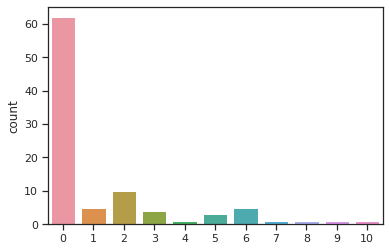

In [183]:
kmp4 = KMeans(n_clusters=11, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = 42)
kmp4.fit(c_scaled)
C_kmp4 = kmp4.predict(c_scaled)

sns.countplot(C_kmp4);
kmp4.labels_

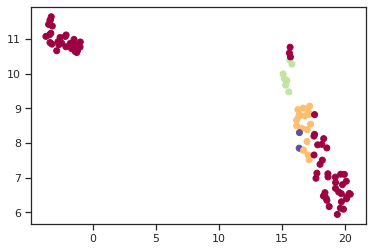

In [215]:
X2D = umap.UMAP(random_state=42).fit_transform(c_scaled)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_kmp2, cmap='Spectral');

In [185]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
#modified code from http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

def silplot(X, clusterer, pointlabels=None):
    cluster_labels = clusterer.labels_
    n_clusters = clusterer.n_clusters
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(11,8.5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters = ", n_clusters,
          ", the average silhouette_score is ", silhouette_avg,".",sep="")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(0,n_clusters+1):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=200, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    xs = X[:, 0]
    ys = X[:, 1]
    
    if pointlabels is not None:
        for i in range(len(xs)):
            plt.text(xs[i],ys[i],pointlabels[i])

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % int(i), alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

For n_clusters = 10, the average silhouette_score is 0.2618493658892217.


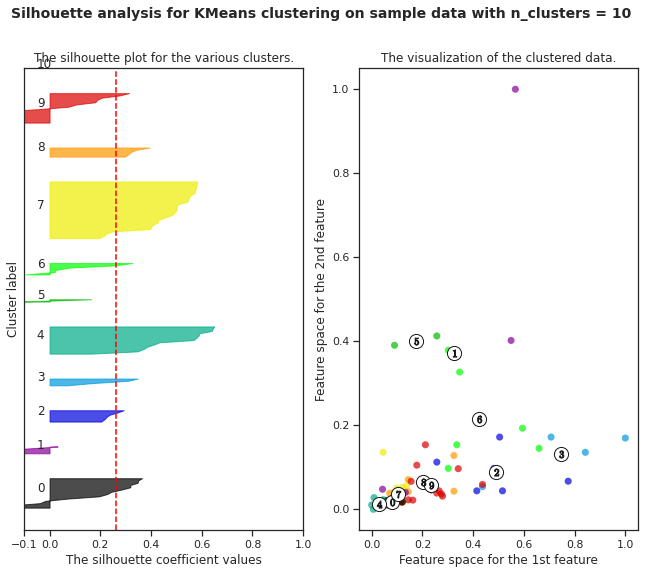

In [216]:
# run k-means with 10 clusters
ms_kmeans = KMeans(n_clusters=10, init='random', n_init=3, random_state=54).fit(c_scaled)

# plot a fancy silhouette plot
silplot(c_scaled.values, ms_kmeans)